# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Arsya Zain Yashifa
- **Email:** arsyazain03@gmail.com
- **ID Dicoding:** MC006D5Y1300

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berdasarkan musim dalam satu tahun terakhir?
- Pada jam berapa penggunaan sepeda paling tinggi dan paling rendah dalam satu hari?

## Import Semua Packages/Library yang Digunakan

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [69]:
data = pd.read_csv('https://raw.github.com/mazenbuk/ppm/main/Bike%20Sharing%20Dataset/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset yang digunakan adalah Bike Sharing Dataset. Terdapat 2 file, yaitu hour.csv dan day.csv. Kedua file memiliki kolom yang sama, kecuali day.csv tidak memiliki kolom 'hr'.
- Dataset memiliki 17 kolom.

### Assessing Data

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [71]:
print("Jumlah missing values: ", data.isna().sum().sum())

Jumlah missing values:  0


In [72]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


In [73]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing values dan data yang duplikat
- 'cnt' memiliki nilai maksimum yang jauh lebih besar dibandingkan rata-rata yang kemungkinan ini ada outlier.

### Cleaning Data

#### Mengubah tipe data kolom dteday dari object menjadi datetime

In [74]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Handle nilai cnt yang beresiko outlier dengan metode IQR

In [76]:
Q1 = data["cnt"].quantile(0.25)
Q3 = data["cnt"].quantile(0.75)
IQR = Q3 - Q1

min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

data = data[(data["cnt"] >= min) & (data["cnt"] <= max)]

In [77]:
data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2011-12-26 23:54:06.699063808,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,2011-06-29 00:00:00,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,2011-12-23 00:00:00,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,2012-06-23 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000
std,5007.766040,NaN,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918


**Insight:**
- Variabel 'dteday' dikonversi ke format datetime untuk mempermudah analisis berbasis waktu.
- Menghapus baris dengan nilai cnt tertinggi karena berpotensi menjadi outlier.

## Exploratory Data Analysis (EDA)

### Explore ...

#### Mapping musim dan mengelompokkannya

In [78]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
data["season_label"] = data["season"].map(season_mapping)
data_season = data.groupby("season_label")["cnt"].agg(["count", "sum", "mean", "std"]).reset_index()
data_season

<ipython-input-78-000ae6f74e2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["season_label"] = data["season"].map(season_mapping)


,season_label,count,sum,mean,std
0,Fall,4298,909146,211.527687,164.155127
1,Spring,4223,457818,108.410609,112.405701
2,Summer,4253,805771,189.459440,162.905098
3,Winter,4100,741576,180.872195,154.705937


#### Analisis jumlah penyewaan berdasarkan jam dalam sehari

In [79]:
data_hour = data.groupby("hr")["cnt"].agg(["count", "sum", "mean", "std"]).reset_index()
data_hour

,hr,count,sum,mean,std
0,0,726,39130,53.898072,42.307910
1,1,724,24164,33.375691,33.538727
2,2,715,16352,22.869930,26.578642
3,3,697,8174,11.727403,13.239190
4,4,697,4428,6.352941,4.143818
5,5,717,14261,19.889819,13.200765
6,6,725,55132,76.044138,55.084348
7,7,727,154171,212.064649,161.441936
8,8,600,170715,284.525000,186.288544
9,9,727,159438,219.309491,93.703458


#### Jam dengan penggunaan tertinggi dan terendah

In [80]:
max_hour = data_hour.loc[data_hour["mean"].idxmax()]
min_hour = data_hour.loc[data_hour["mean"].idxmin()]
max_hour, min_hour

(hr           17.000000
 count       577.000000
 sum      214962.000000
 mean        372.551127
 std         169.831967
 Name: 17, dtype: float64,
 hr          4.000000
 count     697.000000
 sum      4428.000000
 mean        6.352941
 std         4.143818
 Name: 4, dtype: float64)

**Insight:**
- Musim semi (1) memiliki jumlah penyewaan terendah dengan rata-rata 108 sepeda per jam, sedangkan musim gugur (3) memiliki jumlah penyewaan tertinggi dengan rata-rata 211 sepeda per jam.
- Penyewaan tertinggi terjadi pada pukul 17:00 dengan rata-rata 372 sepeda, sedangkan penyewaan terendah terjadi pada pukul 04:00 dengan hanya 6 sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

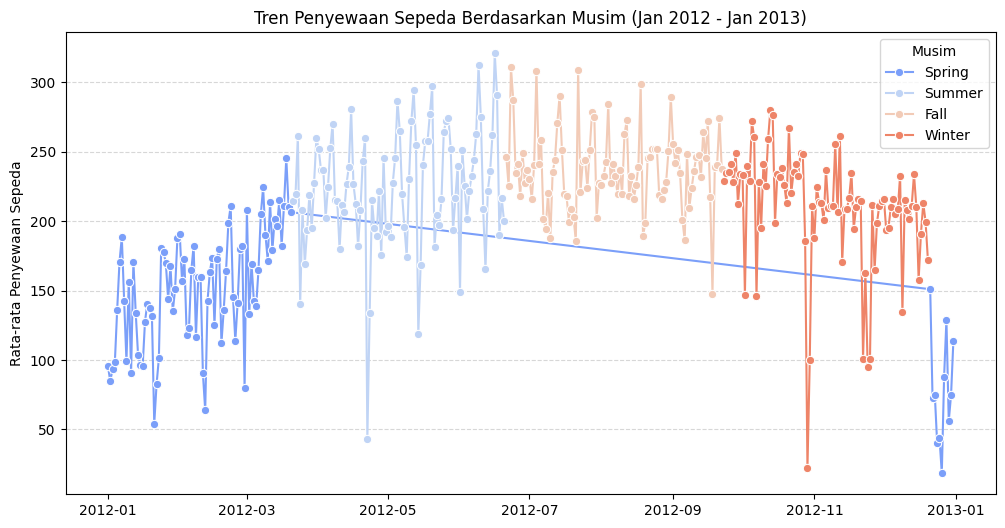

In [81]:
 # Filter data hanya untuk periode 2012-01 hingga 2013-01
data_filtered = data[(data["dteday"] >= "2012-01-01") & (data["dteday"] < "2013-02-01")]

# Mengelompokkan data berdasarkan waktu dan musim
data_season_trend = data_filtered.groupby(["dteday", "season_label"])["cnt"].mean().reset_index()

# Membuat line plot tren penyewaan sepeda berdasarkan musim
plt.figure(figsize=(12, 6))
sns.lineplot(x="dteday", y="cnt", hue="season_label", data=data_season_trend, palette="coolwarm", marker="o")

plt.xlabel(None)
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim (Jan 2012 - Jan 2013)")
plt.legend(title="Musim")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### Pertanyaan 2:

<ipython-input-82-c3cb2de2854c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mean", y="hr", data=top_5_hours, palette=colors, orient='h', order=top_5_order, ax=ax[0])
<ipython-input-82-c3cb2de2854c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mean", y="hr", data=bottom_5_hours, palette=colors, orient='h', order=bottom_5_order, ax=ax[1])


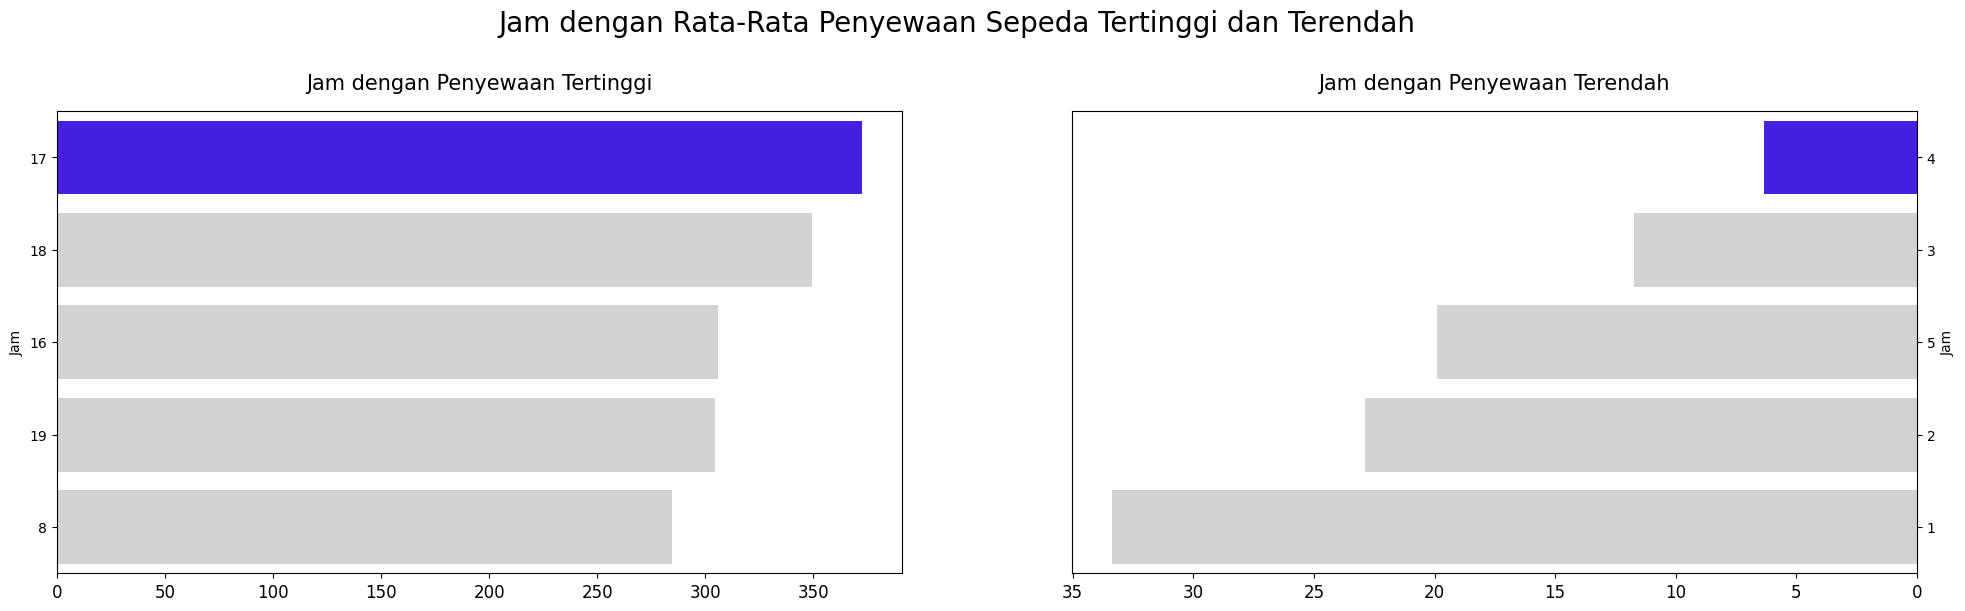

In [82]:
# Menentukan jam dengan penyewaan tertinggi dan terendah
top_5_hours = data_hour.sort_values(by="mean", ascending=False).head(5)
bottom_5_hours = data_hour.sort_values(by="mean", ascending=True).head(5)

# Urutan jam untuk top 5 dan bottom 5
top_5_order = top_5_hours["hr"].tolist()
bottom_5_order = bottom_5_hours["hr"].tolist()

# Membuat plot berdampingan
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna khusus untuk bar terbesar/kecil
colors = ["#3200FF"] + ["#D3D3D3"] * 4

# Bar plot jam dengan penyewaan tertinggi
sns.barplot(x="mean", y="hr", data=top_5_hours, palette=colors, orient='h', order=top_5_order, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel("Jam")
ax[0].set_title("Jam dengan Penyewaan Tertinggi", loc="center", fontsize=15, y=1.03)
ax[0].tick_params(axis='x', labelsize=12)

# Bar plot jam dengan penyewaan terendah
sns.barplot(x="mean", y="hr", data=bottom_5_hours, palette=colors, orient='h', order=bottom_5_order, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel("Jam")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Jam dengan Penyewaan Terendah", loc="center", fontsize=15, y=1.03)
ax[1].tick_params(axis='x', labelsize=12)

plt.suptitle("Jam dengan Rata-Rata Penyewaan Sepeda Tertinggi dan Terendah", fontsize=20, y=1.05)
plt.show()

**Insight:**
- Ada tren kenaikan saat memasuki musim Summer dan penurunan saat memasuki musim Winter
- Dalam satu hari, jam 5 sore merupakan jam dengan penyewaan sepeda tertinggi, sedangkan jam 4 pagi merupakan jam dengan penyewaan sepeda terendah.

## Analisis Lanjutan (Opsional)

## Conclusion

- Penggunaan sepeda meningkat saat musim Summer dan mencapai puncaknya, kemudian menurun saat musim Fall, dan turun drastis di Winter.
- Penggunaan sepeda paling tinggi terjadi pada jam 5 sore dan paling rendah pada jam 4 pagi.